In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
x_data=np.linspace(0.0,10.0,1000000)
noise=np.random.randn(len(x_data))
#y=mx+b
#m=0.5
#b=5
y_true=(0.5*x_data)+5+noise
x_df=pd.DataFrame(data=x_data,columns=['X Data'])
y_df=pd.DataFrame(data=y_true,columns=['Y'])
my_data=pd.concat([x_df,y_df],axis=1)
my_data.head()


,X Data,Y
0,0.00000,5.134257
1,0.00001,2.950076
2,0.00002,4.894244
3,0.00003,5.736281
4,0.00004,4.076502


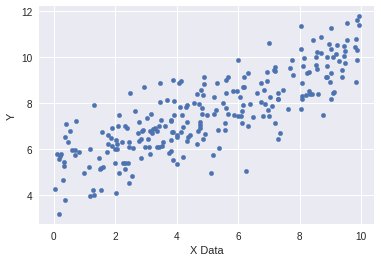

In [3]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')


In [4]:
batch_size=8
print(np.random.randn(2))


[0.61692676 1.54499345]


In [14]:
m=tf.Variable(0.61692676)
b=tf.Variable(1.54499345)
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])
y_model=m*xph+b
error=tf.reduce_sum(tf.square(yph-y_model))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)
init=tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  batches=10000
  for i in  range(batches):
    rand_ind=np.random.randint(len(x_data),size=batch_size)
    feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
    sess.run(train,feed_dict=feed)
  model_m,model_b=sess.run([m,b])
  print(model_m,model_b)
  
  y_hat=x_data*model_m+model_b    

0.5996093 4.993449


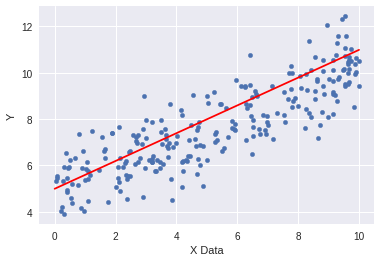

In [15]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')
